# Assignment 4



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# make path = './' in-case you are running this locally
path = '/content/drive/My Drive/ECSE 415/Assignment_4/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift
from sklearn import mixture

# 1.1.1 K-means clustering


##Implement k-means clustering from scratch 

In [ ]:
#Source inspiration : https://codereview.stackexchange.com/questions/205097/k-means-using-numpy
import random
import math

import numpy as np


def kmeans(data, K, max_iterations):

    centers = []

    lgt = len(data)
    # Randomly initialize the K cluster centers
    np.random.seed()
    index = random.sample(range(0,len(data)), K)

    for i in index:
      centers.append(data[i])

    labels = np.random.randint(low=0, high=K, size=data.shape[0])

    for i in range(max_iterations):
      
       #Given the cluster centers, determine points in each cluster
        d = np.array(
            [np.linalg.norm(data - c, axis=1) for c in centers])
            
        # For each point find the closest cluster 
        new = np.argmin(d, axis=0)
        equal = np.array_equal(labels, new)
         #If cluster haven't changed break
        if (equal):
            labels = new
            break
        else:
            labels = new
            for c in range(K):
              #Given points in each cluster, solve for the cluster and set cluster as mean of points in cluster & continue iterating until clusters don't change
                centers[c] = np.mean(data[labels == c], axis=0)

    return labels, centers

##Applying the implementation to RGB 

In [ ]:
flower = cv2.cvtColor(cv2.imread(path+'flower.jpg'), cv2.COLOR_BGR2RGB)

reshapeflower = flower.reshape((-1,3))


def reshape(centers, labels): 
  centers_flower = np.uint8(centers)
  out_flower = centers_flower[labels.flatten()]
  out_flower = out_flower.reshape((flower.shape))
  return out_flower

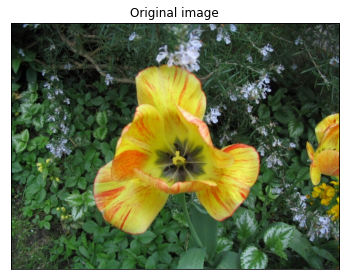

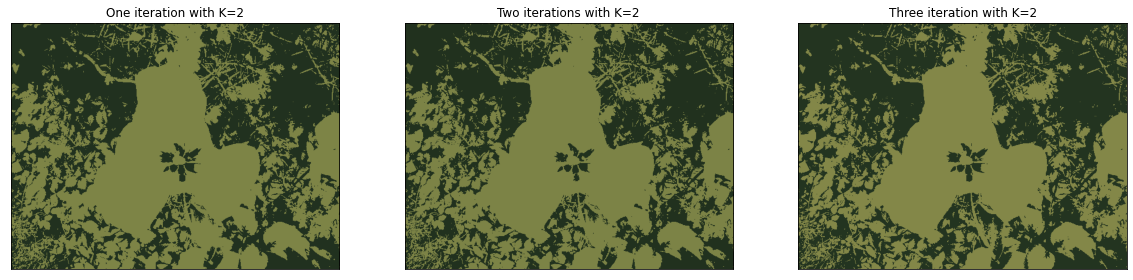

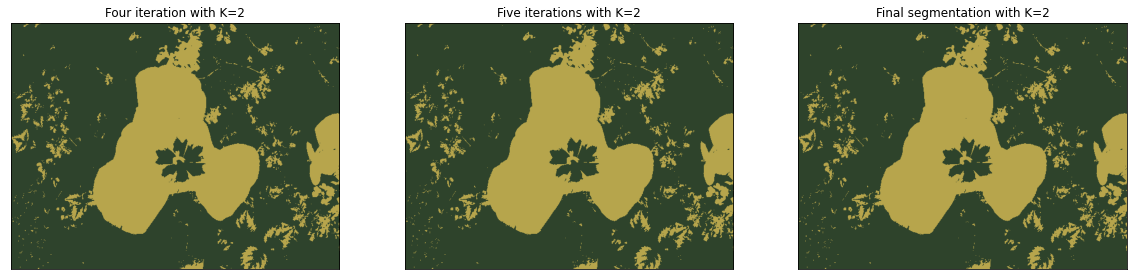

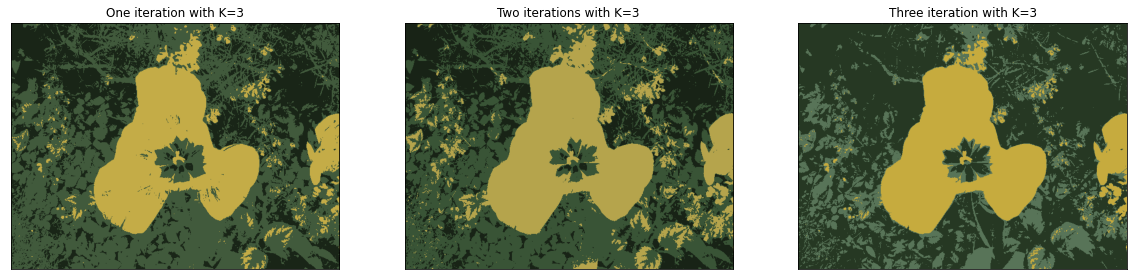

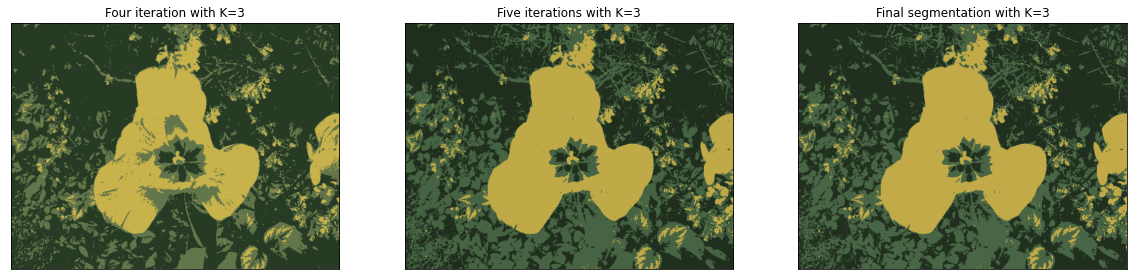

In [ ]:



# convert to np.float32
testflower = np.float32(reshapeflower)

#1st iteration with K=2
labels_flower_K2_1, centers_flower_K2_1 = kmeans(testflower, 2, 1)
#2nd iteration with K=2
labels_flower_K2_2, centers_flower_K2_2 = kmeans(testflower, 2, 2)
#3rd iteration with K=2
labels_flower_K2_3, centers_flower_K2_3 = kmeans(testflower, 2, 3)
#4th iteration with K=2
labels_flower_K2_4, centers_flower_K2_4 = kmeans(testflower, 2, 4)
#5th iteration with K=2
labels_flower_K2_5, centers_flower_K2_5 = kmeans(testflower, 2, 5)
#Final segmentation
labels_flower_K2_final, centers_flower_K2_final = kmeans(testflower, 2, 10)


#1st iteration with K=3
labels_flower_K3_1, centers_flower_K3_1 = kmeans(testflower, 3, 1)
#2nd iteration with K=3
labels_flower_K3_2, centers_flower_K3_2 = kmeans(testflower, 3, 2)
#3rd iteration with K=2
labels_flower_K3_3, centers_flower_K3_3 = kmeans(testflower, 3, 3)
#4th iteration with K=3
labels_flower_K3_4, centers_flower_K3_4 = kmeans(testflower, 3, 4)
#5th iteration with K=3
labels_flower_K3_5, centers_flower_K3_5 = kmeans(testflower, 3, 5)
#Final segmentation
labels_flower_K3_final, centers_flower_K3_final = kmeans(testflower, 3, 10)



#Preparing images to be displayed
out_flower_K2_1 = reshape(centers_flower_K2_1, labels_flower_K2_1)
out_flower_K2_2 = reshape(centers_flower_K2_2, labels_flower_K2_2)
out_flower_K2_3 = reshape(centers_flower_K2_3, labels_flower_K2_3)
out_flower_K2_4 = reshape(centers_flower_K2_4, labels_flower_K2_4)
out_flower_K2_5 = reshape(centers_flower_K2_5, labels_flower_K2_5)
out_flower_K2_final = reshape(centers_flower_K2_final,  labels_flower_K2_final)



#Preparing images to be displayed
out_flower_K3_1 = reshape(centers_flower_K3_1, labels_flower_K3_1)
out_flower_K3_2 = reshape(centers_flower_K3_2, labels_flower_K3_2)
out_flower_K3_3 = reshape(centers_flower_K3_3, labels_flower_K3_3)
out_flower_K3_4 = reshape(centers_flower_K3_4, labels_flower_K3_4)
out_flower_K3_5 = reshape(centers_flower_K3_5, labels_flower_K3_5)
out_flower_K3_final = reshape(centers_flower_K3_final,  labels_flower_K3_final)

#Displaying original
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(flower)
plt.title("Original image"), plt.xticks([]), plt.yticks([])

#Displaying K2 images 
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(out_flower_K2_1)
plt.title("One iteration with K=2"), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(out_flower_K2_2)
plt.title("Two iterations with K=2"), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(out_flower_K2_3)
plt.title("Three iteration with K=2"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(out_flower_K2_4)
plt.title("Four iteration with K=2"), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(out_flower_K2_5)
plt.title("Five iterations with K=2"), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(out_flower_K2_final)
plt.title("Final segmentation with K=2"), plt.xticks([]), plt.yticks([])

#Displaying K3 images 
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(out_flower_K3_1)
plt.title("One iteration with K=3"), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(out_flower_K3_2)
plt.title("Two iterations with K=3"), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(out_flower_K3_3)
plt.title("Three iteration with K=3"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(out_flower_K3_4)
plt.title("Four iteration with K=3"), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(out_flower_K3_5)
plt.title("Five iterations with K=3"), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(out_flower_K3_final)
plt.title("Final segmentation with K=3"), plt.xticks([]), plt.yticks([])

plt.show()



##Applying the implementation to grayscale image

In [ ]:
g_flower = cv2.cvtColor(cv2.imread(path+'flower.jpg'), cv2.COLOR_BGR2GRAY)


i,j = g_flower.shape
g2_flower = g_flower.reshape((i*j,1))
gray_flower = np.float32(g2_flower)
def g_reshape(centers, labels): 
  centers_flower = np.uint8(centers)
  out_flower = centers_flower[labels.flatten()]
  out_flower = out_flower.reshape((g_flower.shape))
  return out_flower

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


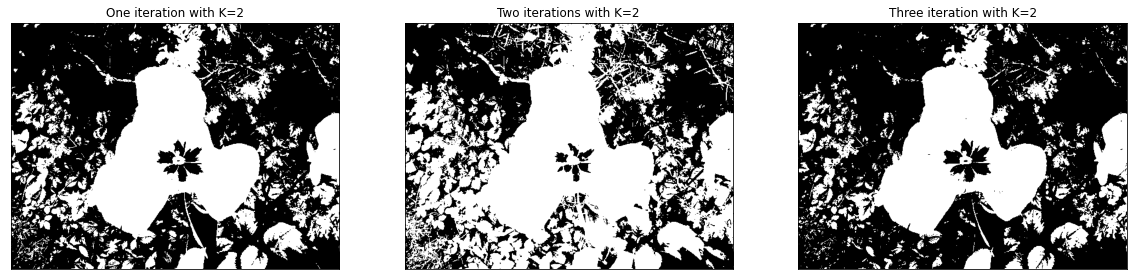

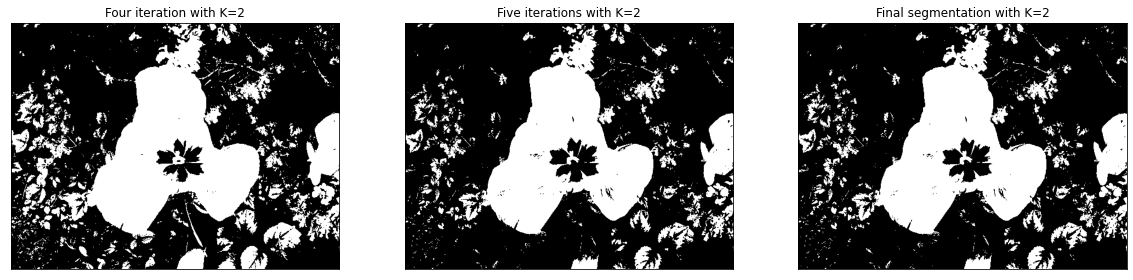

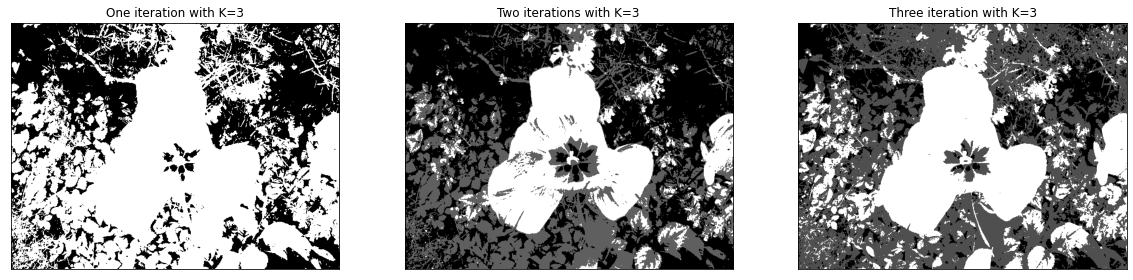

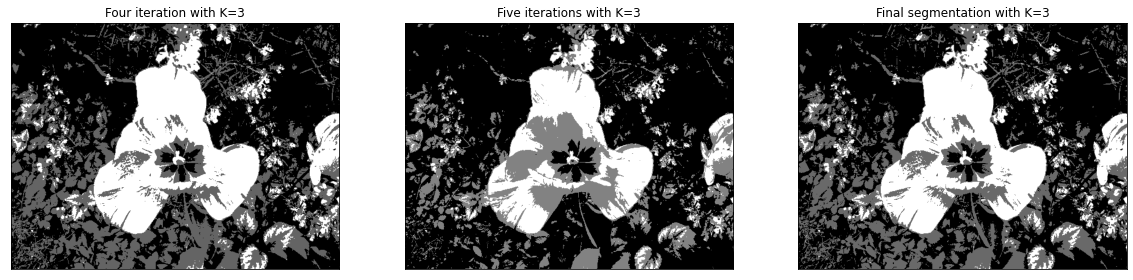

In [ ]:



#1st iteration with K=2
labels_flower_K2_1_g, centers_flower_K2_1_g = kmeans(gray_flower, 2, 1)
#2nd iteration with K=2
labels_flower_K2_2_g, centers_flower_K2_2_g = kmeans(gray_flower, 2, 2)
#3rd iteration with K=2
labels_flower_K2_3_g, centers_flower_K2_3_g = kmeans(gray_flower, 2, 3)
#4th iteration with K=2
labels_flower_K2_4_g, centers_flower_K2_4_g = kmeans(gray_flower, 2, 4)
#5th iteration with K=2
labels_flower_K2_5_g, centers_flower_K2_5_g = kmeans(gray_flower, 2, 5)
#Final segmentation
labels_flower_K2_final_g, centers_flower_K2_final_g = kmeans(gray_flower, 2, 10)


#1st iteration with K=3
labels_flower_K3_1_g, centers_flower_K3_1_g = kmeans(gray_flower, 3, 1)
#2nd iteration with K=3
labels_flower_K3_2_g, centers_flower_K3_2_g = kmeans(gray_flower, 3, 2)
#3rd iteration with K=2
labels_flower_K3_3_g, centers_flower_K3_3_g = kmeans(gray_flower, 3, 3)
#4th iteration with K=3
labels_flower_K3_4_g, centers_flower_K3_4_g = kmeans(gray_flower, 3, 4)
#5th iteration with K=3
labels_flower_K3_5_g, centers_flower_K3_5_g = kmeans(gray_flower, 3, 5)
#Final segmentation
labels_flower_K3_final_g, centers_flower_K3_final_g = kmeans(gray_flower, 3, 10)



#Preparing images to be displayed
out_flower_K2_1_g = g_reshape(centers_flower_K2_1_g, labels_flower_K2_1_g)
out_flower_K2_2_g = g_reshape(centers_flower_K2_2_g, labels_flower_K2_2_g)
out_flower_K2_3_g = g_reshape(centers_flower_K2_3_g, labels_flower_K2_3_g)
out_flower_K2_4_g = g_reshape(centers_flower_K2_4_g, labels_flower_K2_4_g)
out_flower_K2_5_g = g_reshape(centers_flower_K2_5_g, labels_flower_K2_5_g)
out_flower_K2_final_g = g_reshape(centers_flower_K2_final_g,  labels_flower_K2_final_g)



#Preparing images to be displayed
out_flower_K3_1_g = g_reshape(centers_flower_K3_1_g, labels_flower_K3_1_g)
out_flower_K3_2_g = g_reshape(centers_flower_K3_2_g, labels_flower_K3_2_g)
out_flower_K3_3_g = g_reshape(centers_flower_K3_3_g, labels_flower_K3_3_g)
out_flower_K3_4_g = g_reshape(centers_flower_K3_4_g, labels_flower_K3_4_g)
out_flower_K3_5_g = g_reshape(centers_flower_K3_5_g, labels_flower_K3_5_g)
out_flower_K3_final_g = g_reshape(centers_flower_K3_final_g,  labels_flower_K3_final_g)

#Displaying K2 images 
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(out_flower_K2_1_g, cmap="gray")
plt.title("One iteration with K=2"), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(out_flower_K2_2_g, cmap="gray")
plt.title("Two iterations with K=2"), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(out_flower_K2_3_g, cmap="gray")
plt.title("Three iteration with K=2"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(out_flower_K2_4_g, cmap="gray")
plt.title("Four iteration with K=2"), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(out_flower_K2_5_g, cmap="gray")
plt.title("Five iterations with K=2"), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(out_flower_K2_final_g, cmap="gray")
plt.title("Final segmentation with K=2"), plt.xticks([]), plt.yticks([])

#Displaying K3 images 
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(out_flower_K3_1_g, cmap="gray")
plt.title("One iteration with K=3"), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(out_flower_K3_2_g, cmap="gray")
plt.title("Two iterations with K=3"), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(out_flower_K3_3_g, cmap="gray")
plt.title("Three iteration with K=3"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(out_flower_K3_4_g, cmap="gray")
plt.title("Four iteration with K=3"), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(out_flower_K3_5_g, cmap="gray")
plt.title("Five iterations with K=3"), plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(out_flower_K3_final_g, cmap="gray")
plt.title("Final segmentation with K=3"), plt.xticks([]), plt.yticks([])

plt.show()

##Comparing the grayscale and color images segmentation results

We were able to get better segmentation results from the RGB images. Indeed , when comparing the final grayscale segmentation with K=3 with the color one and the original , we can see that the color segmentation groups the entire flower under one color , while the grayscale image has multiple shades of grey to depict the flower. This can be due to the fact that grayscale images does not see colors as they truly are and so shadows can be viewed as boundaries. The grayscale intensity is also not as broad as RGB colors which is why some boundaries may be missed in some cases. 

# Question 2

##Download the dataset

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
#Source : Tutorial 8 cifar10_tutorial & https://nextjournal.com/gkoehler/pytorch-mnist


traindata = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True,  transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
trainload = torch.utils.data.DataLoader(traindata, batch_size=32,
                                          shuffle=True, num_workers=2)

testdata = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
testload = torch.utils.data.DataLoader(testdata, batch_size=32,
                                         shuffle=False, num_workers=2)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


##Implement a CNN

In [ ]:
#Source : Tutorial 8 & https://nextjournal.com/gkoehler/pytorch-mnist
#Checking the size of our data to know the size of the images and make sure we have batches of 32
examples = enumerate(testload)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#CNN
class Net(nn.Module):

  
    def __init__(self):
        super(Net, self).__init__()

        #1 input channel in the first convolutional layer because our output is B&W
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64,64,kernel_size =3)
        self.conv4 = nn.Conv2d(64,64,kernel_size =3)
        self.fc1 = nn.Linear(4096, 10)
     


  #ReLU activations
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(-1, 4096)
        x = self.fc1(x)
    
        return x

net = Net()

##SGD Optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

##Train the CNN for 12 epochs

In [ ]:
#Source : Winter 2021 ECSE 415 Tutorial 8 & https://nextjournal.com/gkoehler/pytorch-mnist


for epoch in range(12):  

    running_loss = 0.0
    for i, data in enumerate(trainload, 0):
       
        inputs, labels = data

    
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        
        

print('Finished Training')

Finished Training


## Predicts labels of the test images using the above trained CNN. Measure and display classification accuracy. 

In [ ]:
#Source : Winter 2021 ECSE 415 Tutorial 8
classes = ('0','1', '2', '3', '4',
           '5', '6', '7', '8', '9')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testload:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 99 %
Accuracy of     1 : 99 %
Accuracy of     2 : 97 %
Accuracy of     3 : 99 %
Accuracy of     4 : 99 %
Accuracy of     5 : 95 %
Accuracy of     6 : 99 %
Accuracy of     7 : 100 %
Accuracy of     8 : 99 %
Accuracy of     9 : 100 %
